In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')
import warnings
warnings.simplefilter('ignore')

## Box-Cox Transform
> Box-Cox在1964年從實際數據出發, 提出了一個很有效的轉換:
> $y(\lambda) = 
    \begin{cases}
    \frac {y^{\lambda} - 1} {\lambda} & \quad \lambda \neq 0 \\
    ln(y) & \quad \lambda =  0
    \end{cases}$   
> $y(\lambda)$ 是經過Box-Cox transform後的新變數, $y$ 為原始連續應變數, $\lambda$ 為轉換參數.   

- 此轉換有以下特點：
>改變分佈形狀，使之正態分佈，至少是對稱的,   
>當$ y \geq 0 $，能保持數據大小次序,   
>對轉換結果有很好的可解釋性:    
>> $ \lambda = 2 $為平方變換,   
>> $ \lambda = 1 $為恆等變換,   
>> $ \lambda = 0.5 $為平方根變換,   
>> $ \lambda = 0 $為對數變換,   
>> $ \lambda = -0.5 $為平方根倒數變換,   
>> $ \lambda = -1 $為倒數變換.   

- 小結   
>很多右偏數據可以正態化,   
>對數變換後呈正態分佈，方差穩定,   
>不太嚴重的右偏，使用平方根變換,   
>嚴重右偏，倒數變換.   

In [2]:
from sklearn.datasets import load_boston
house = load_boston()
df = pd.DataFrame(house.data, columns=house.feature_names)
df['PRICE'] = house.target
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


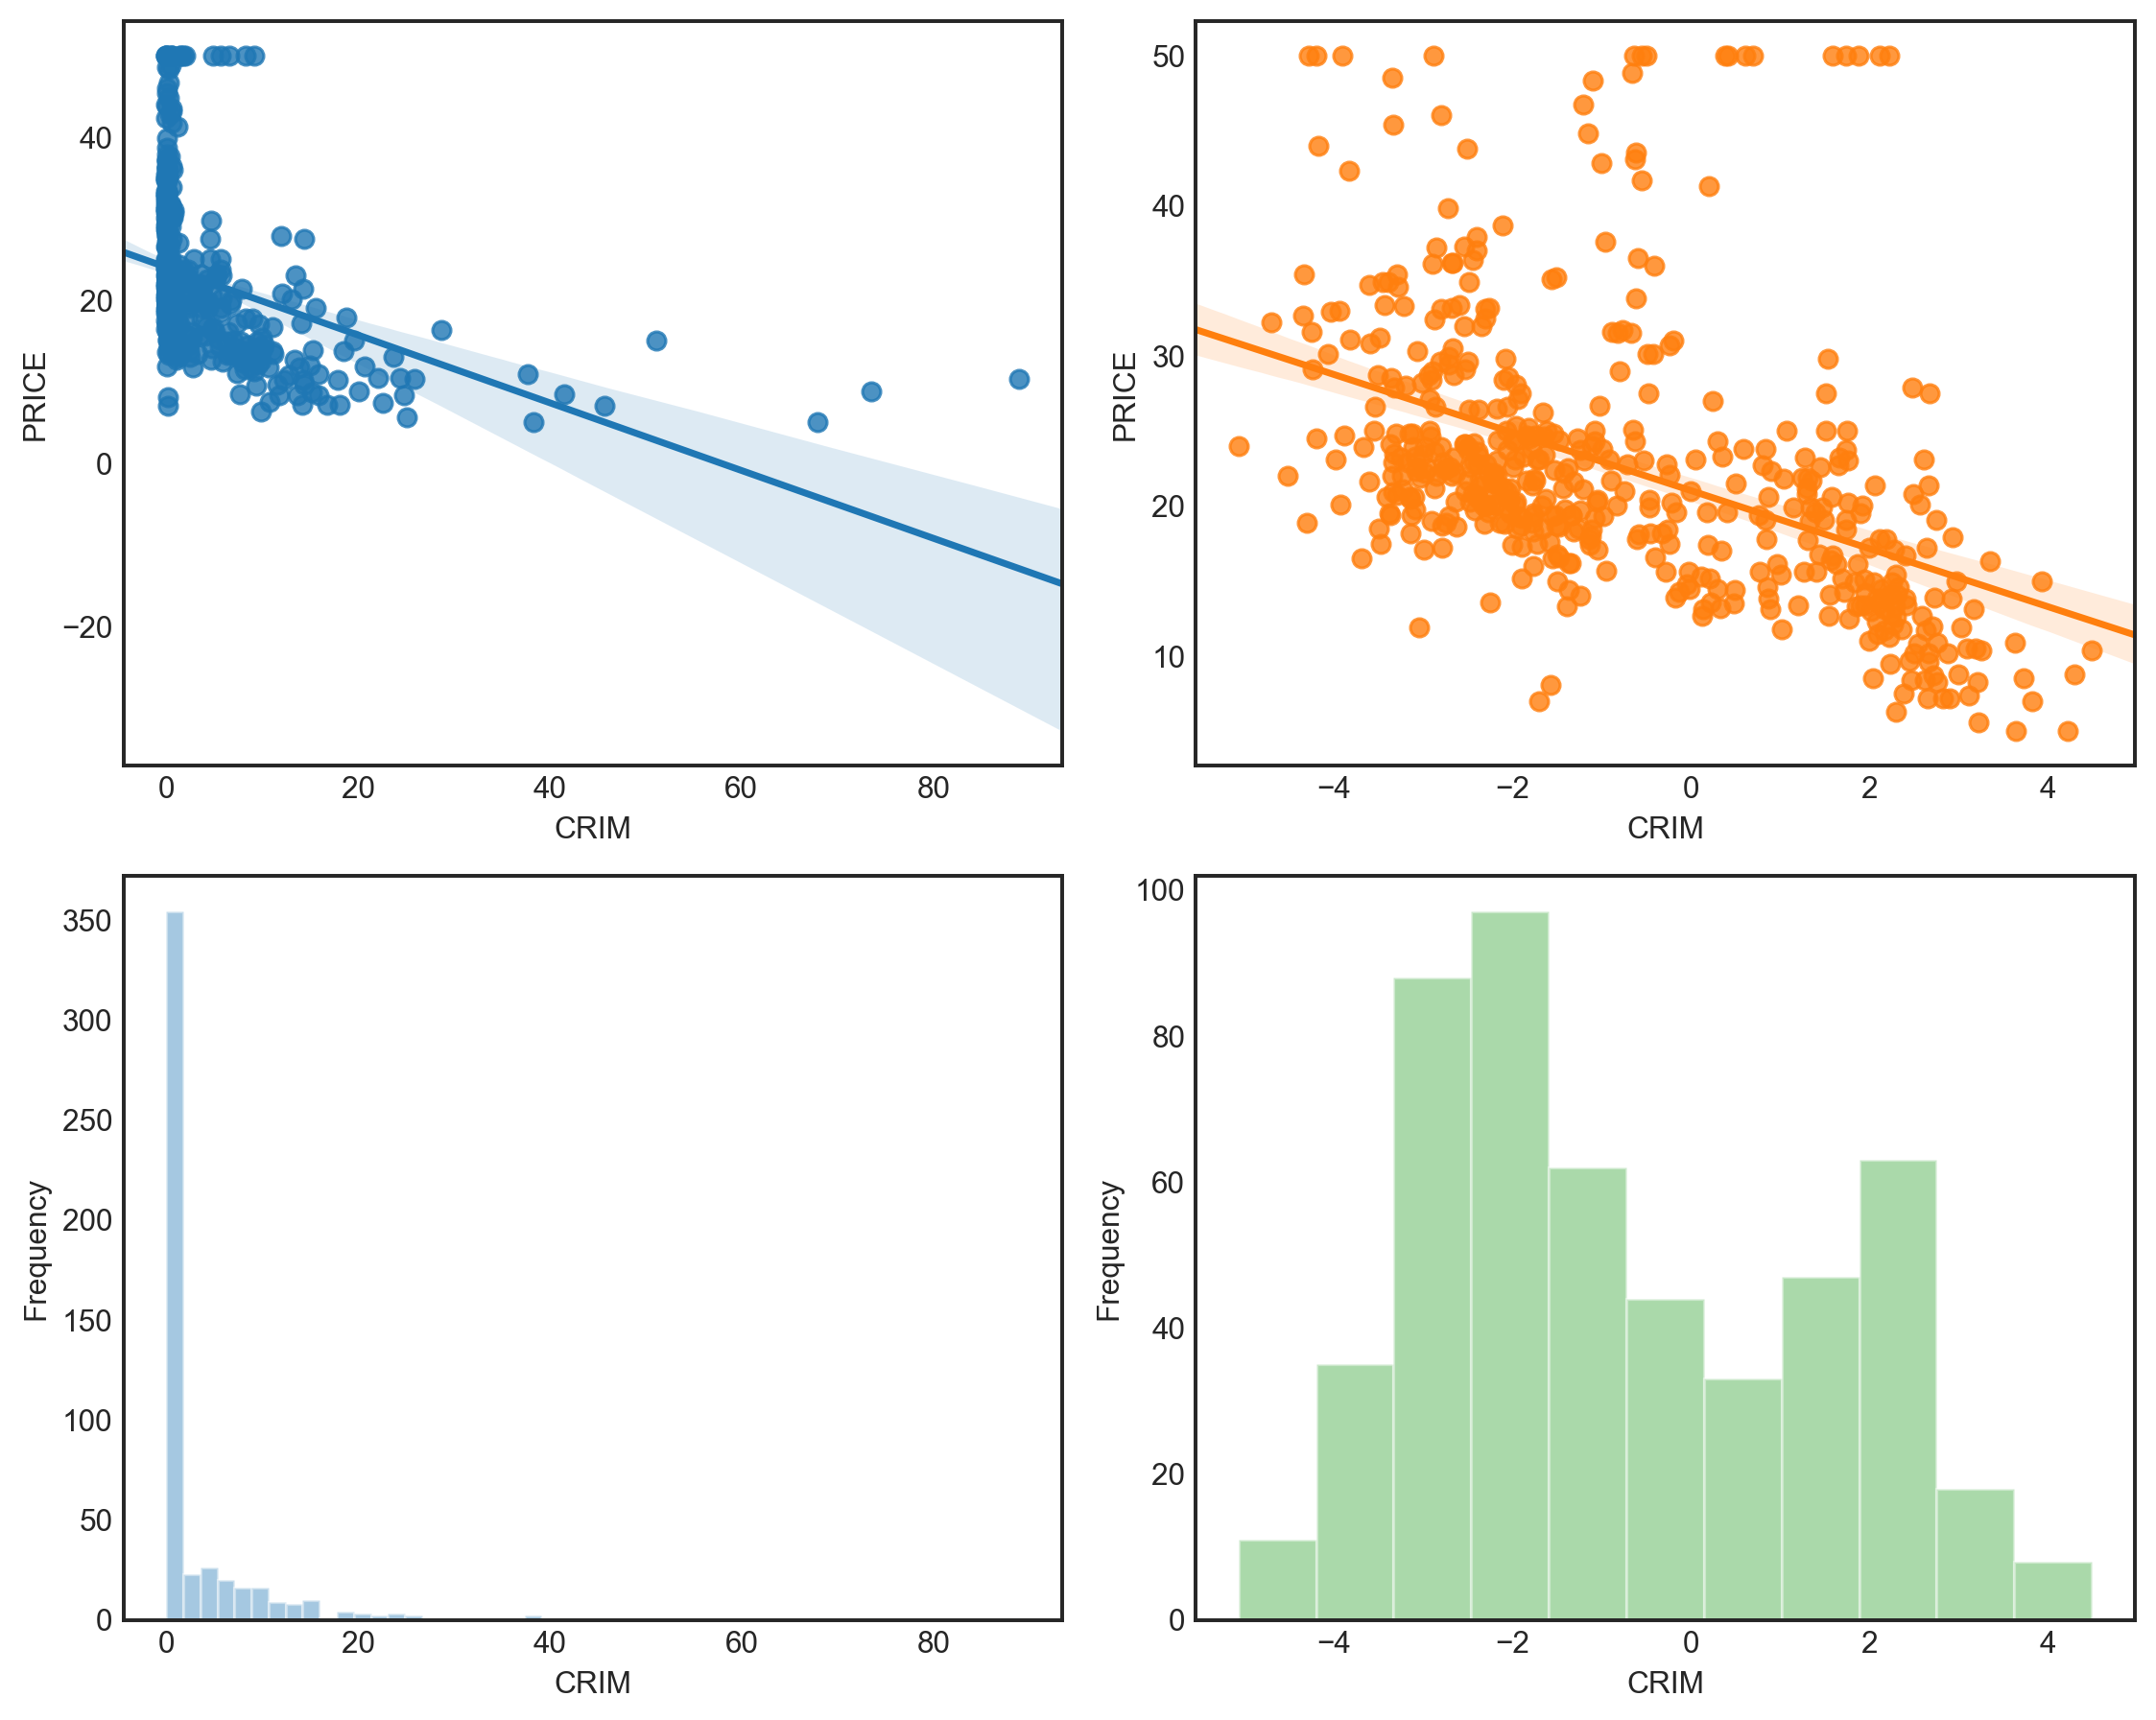

In [3]:
fig, axes = plt.subplots(2, 2, dpi=227, figsize=(10, 8))
axes = axes.ravel()
sns.regplot(df['CRIM'], df['PRICE'], ax=axes[0])
sns.regplot(np.log(df['CRIM']), df['PRICE'], ax=axes[1])

sns.distplot(df['CRIM'], kde=False, ax=axes[2], hist_kws={'edgecolor': 'w'})
axes[2].set_ylabel('Frequency')
sns.distplot(np.log(df['CRIM']), kde=False, ax=axes[3], hist_kws={'edgecolor': 'w'})
axes[3].set_ylabel('Frequency')
plt.tight_layout()

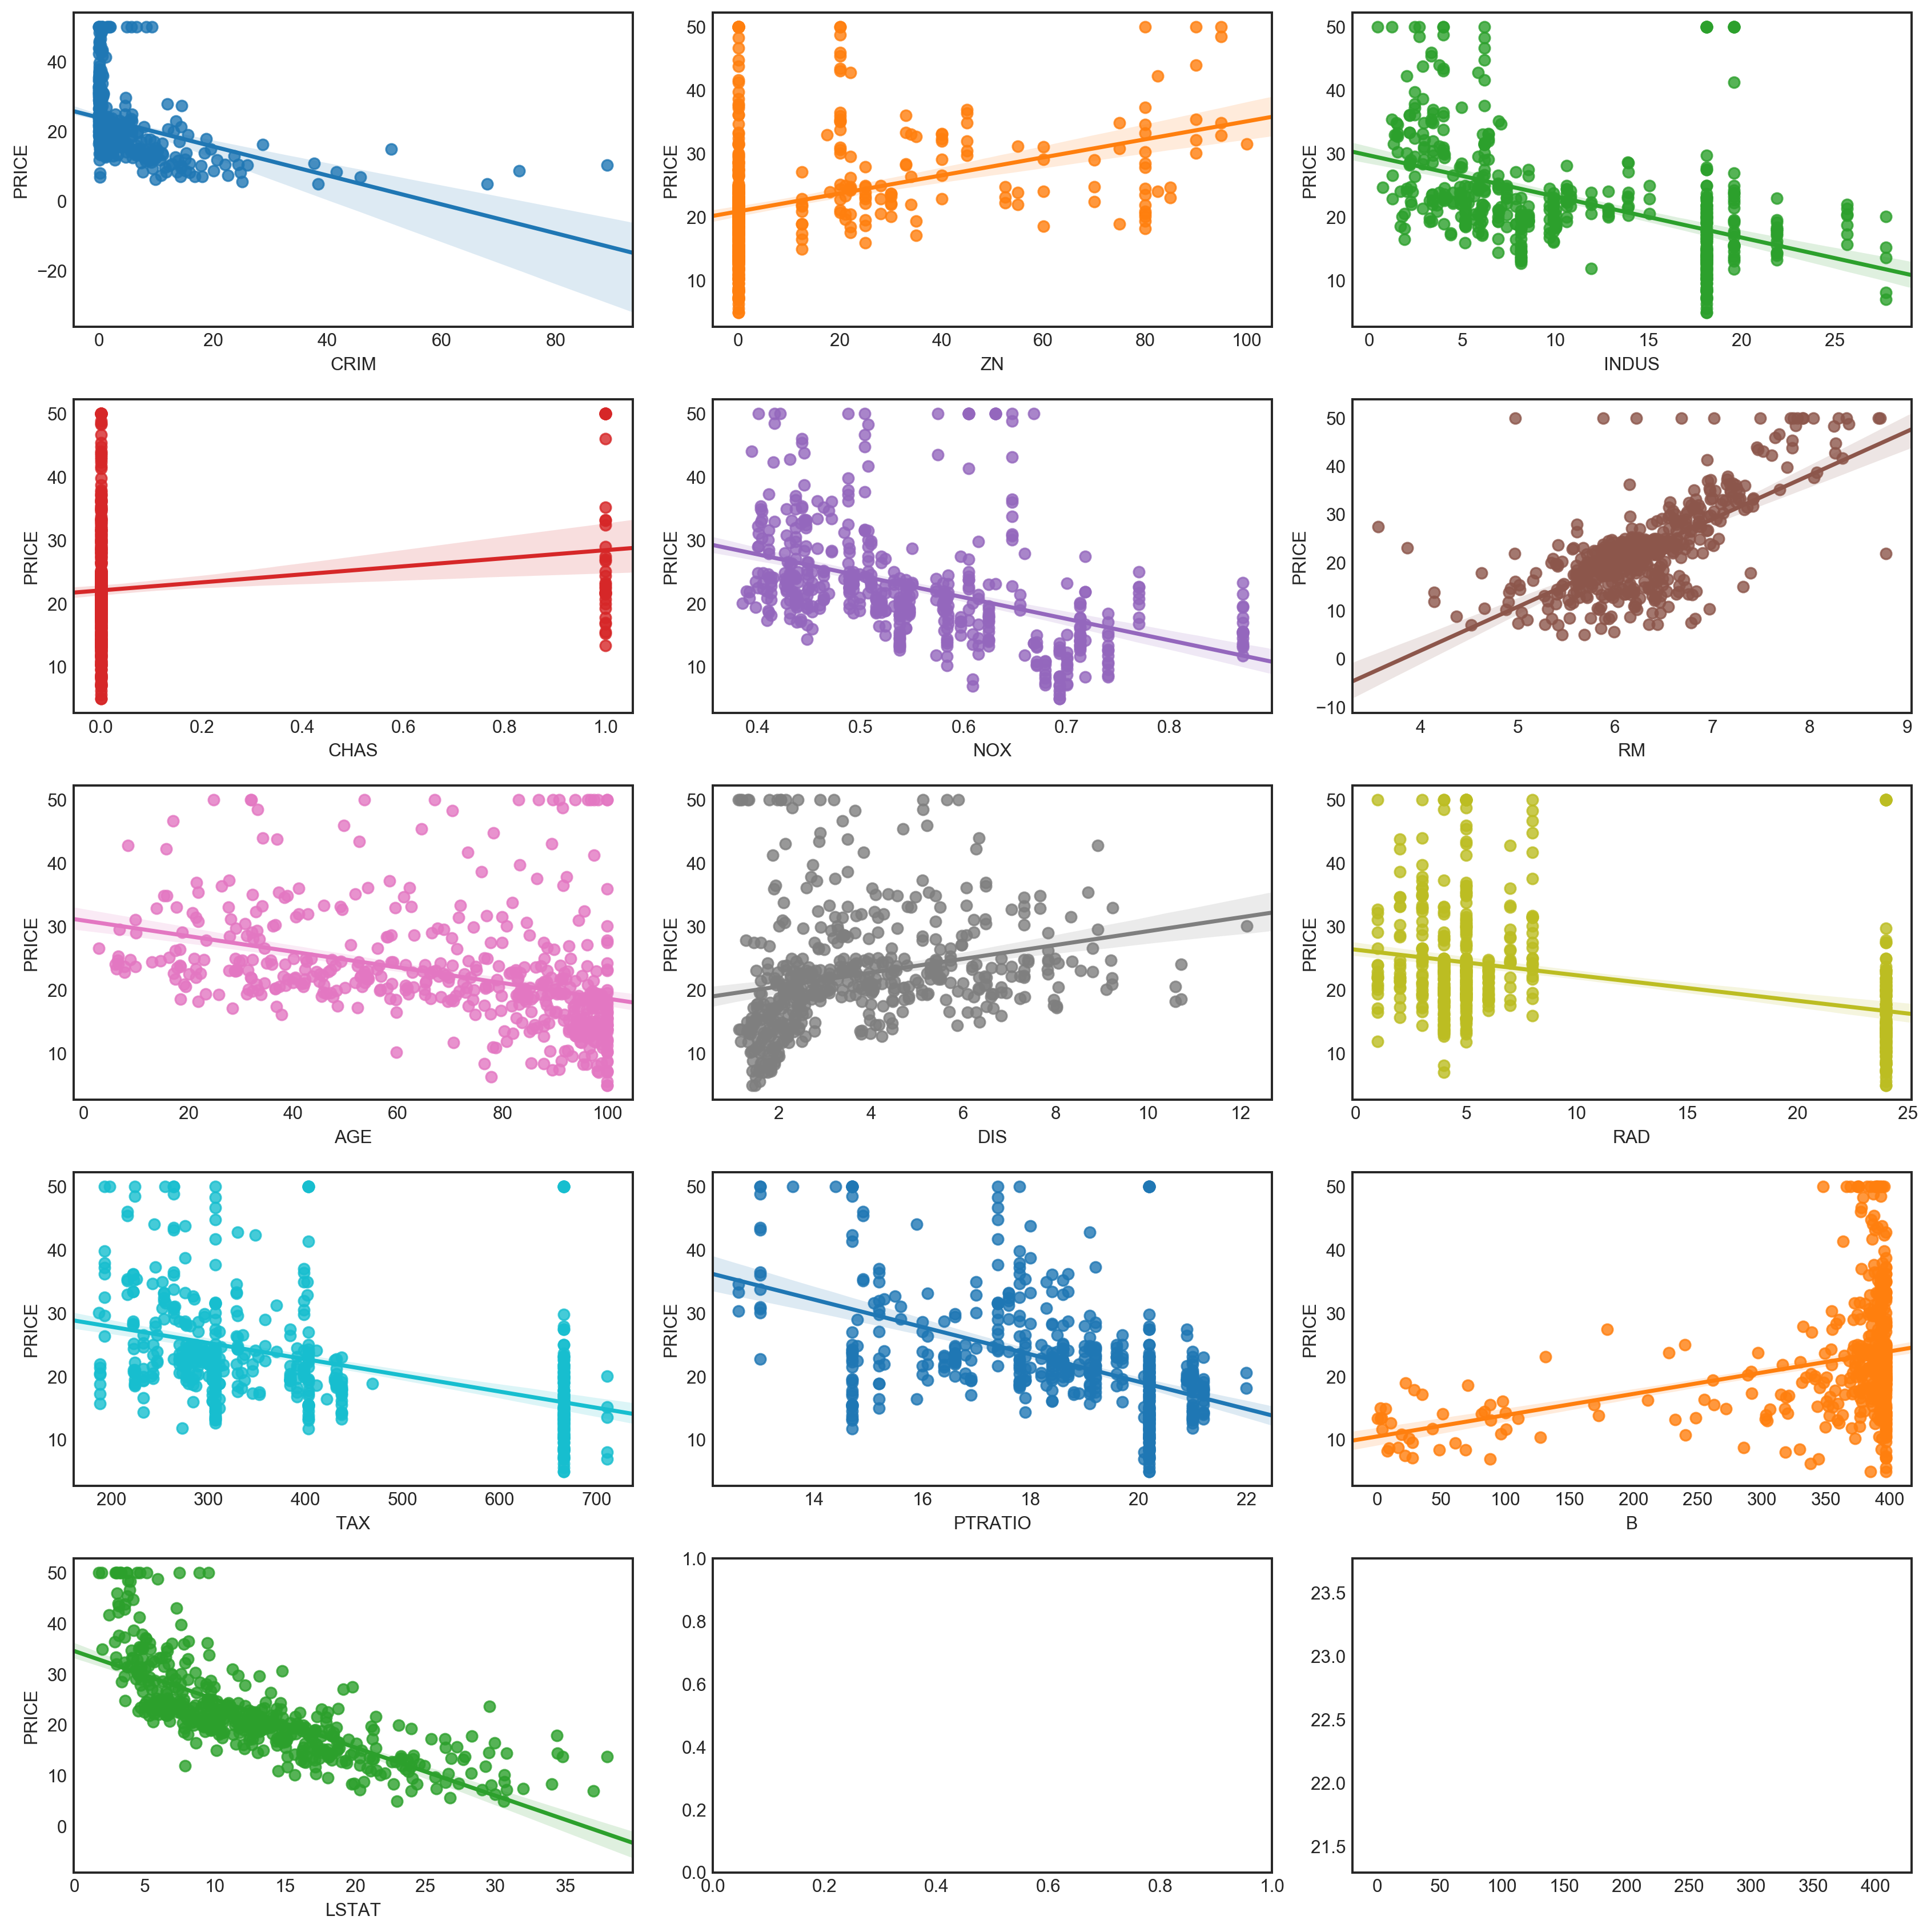

In [4]:
fig, axes = plt.subplots(5, 3, dpi=227, figsize=(15, 15))
for i in range(df.shape[1]-1):
    sns.regplot(df[df.columns[i]], df['PRICE'], ax=axes.ravel()[i])
plt.tight_layout()

### scipy.stats.boxcox
#### scipy.stats.boxcox(x, lmbda=None, alpha=None)
Return a positive dataset transformed by a Box-Cox power transformation.

> If lmbda is not None, do the transformation for that value.

> If lmbda is None, find the lambda that maximizes the log-likelihood function and return it as the second output argument.

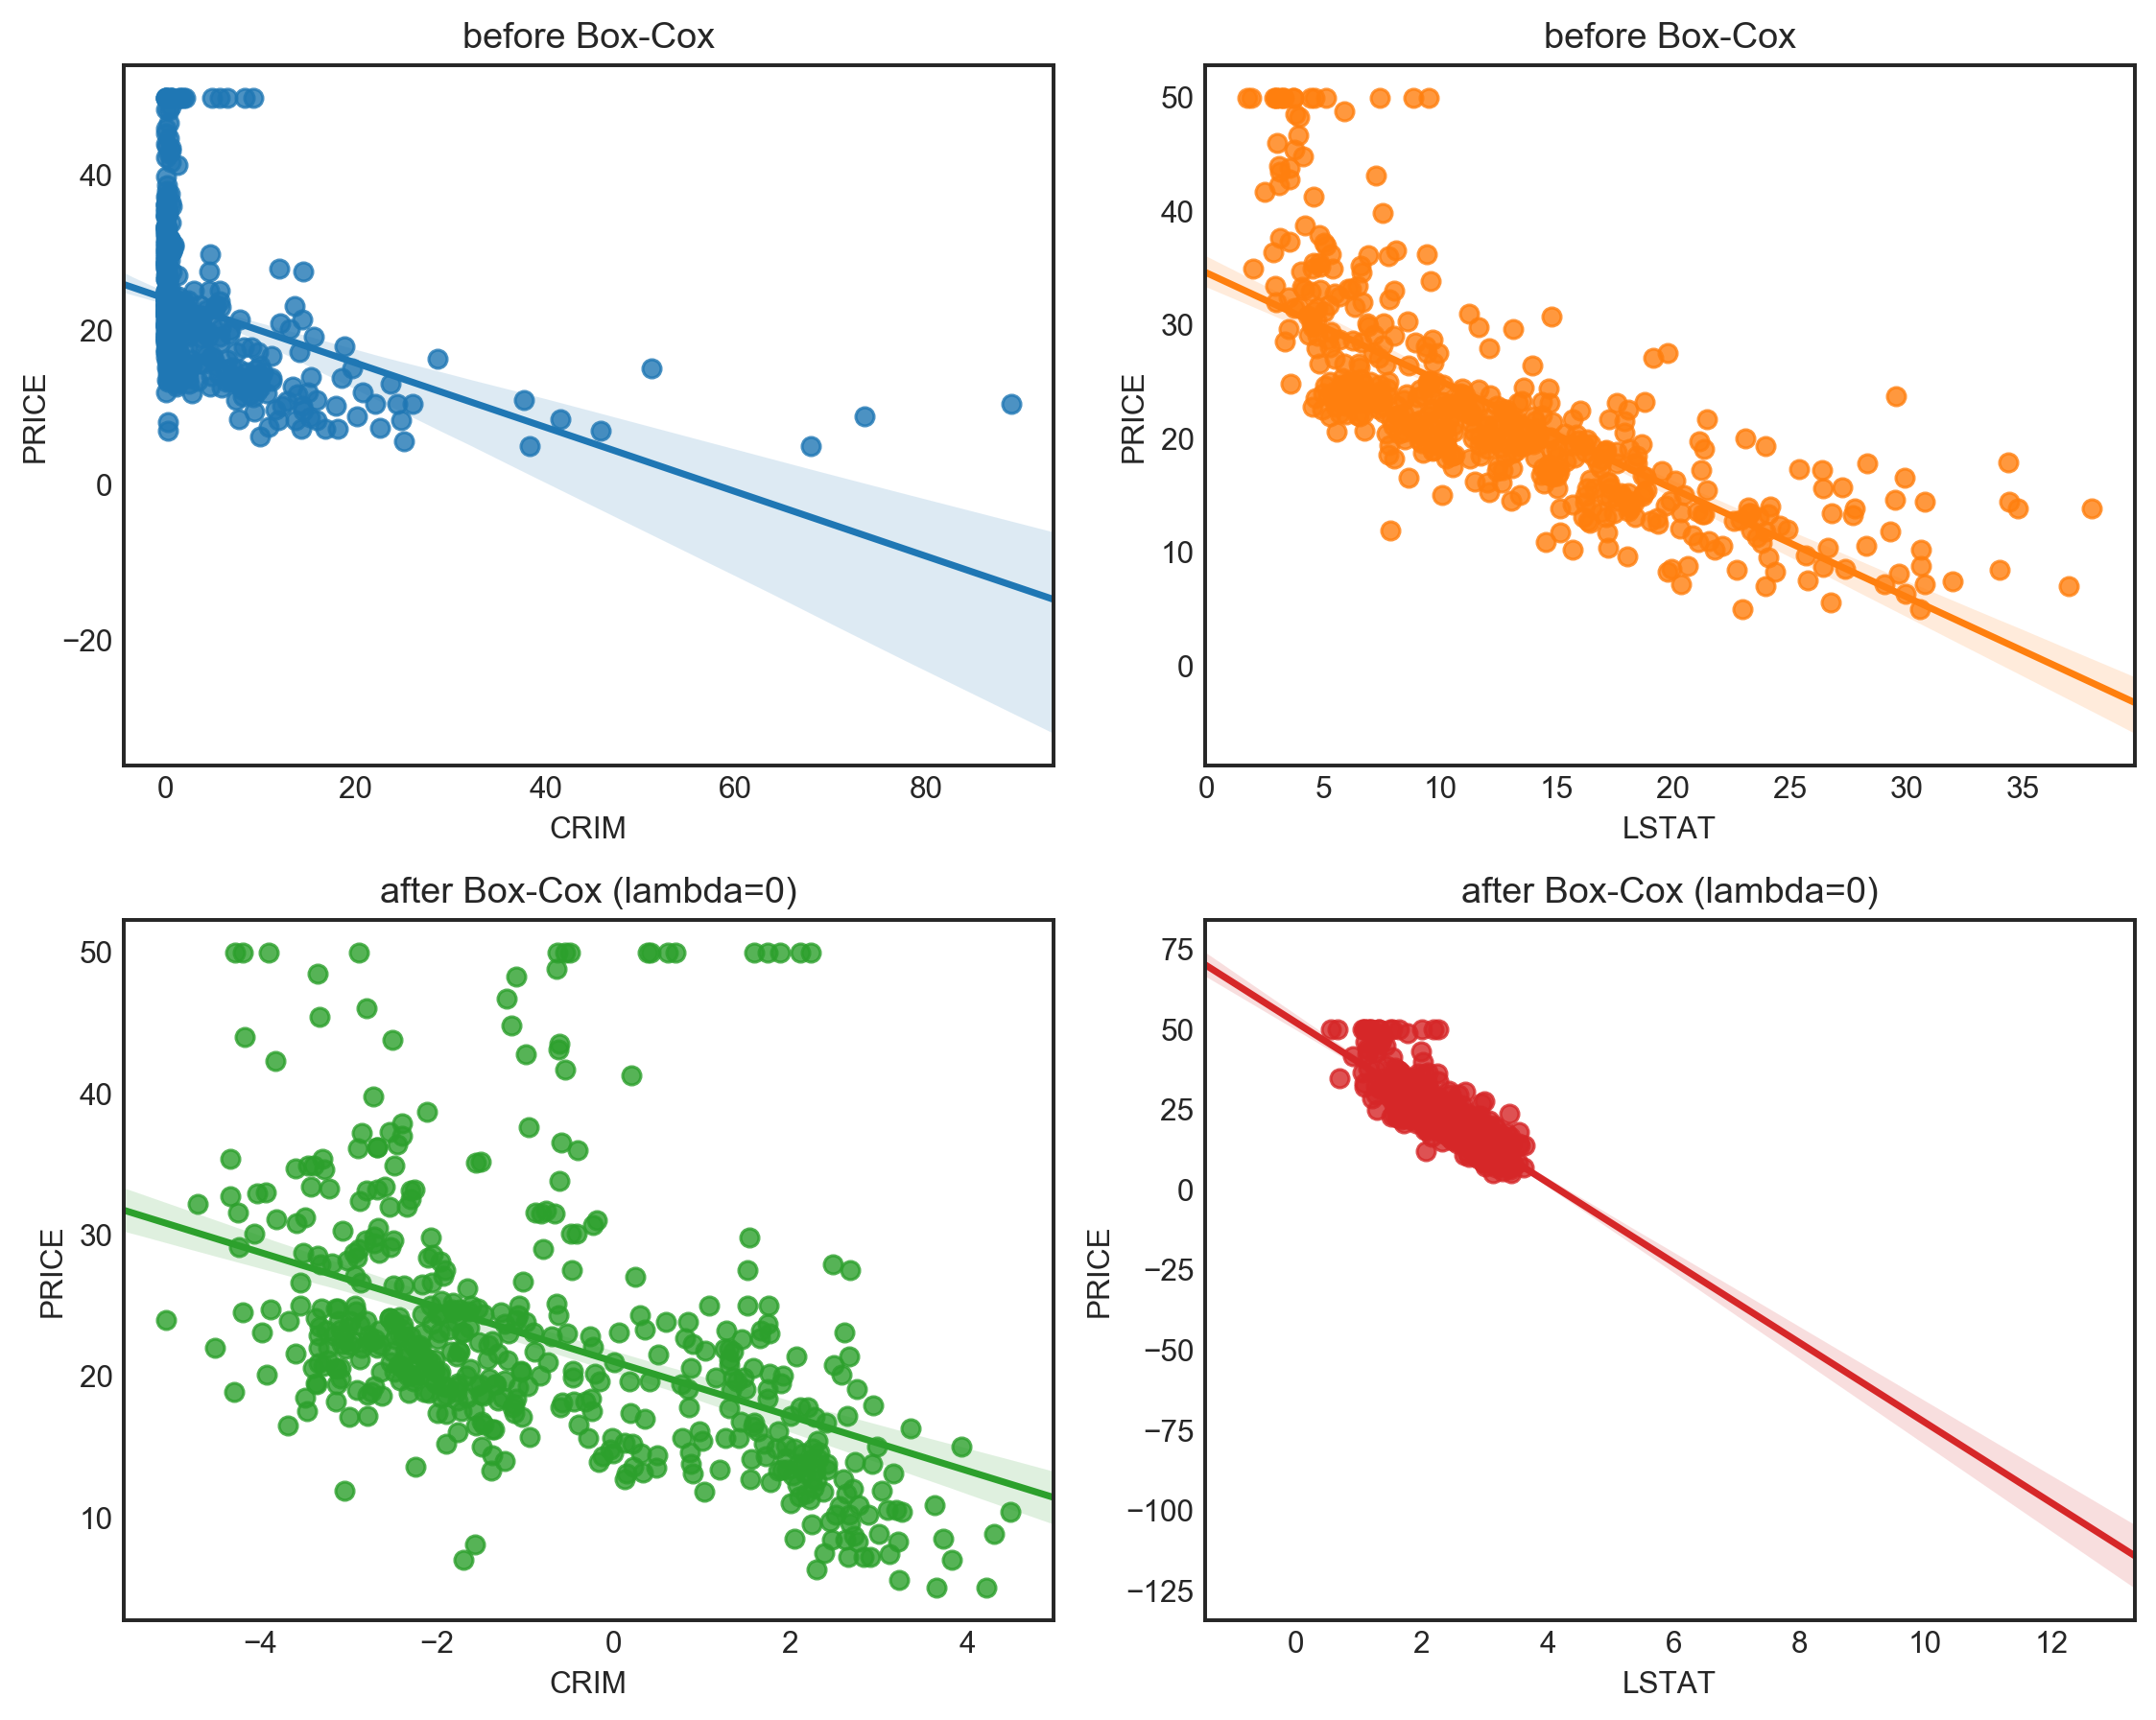

In [5]:
from scipy import stats

house = load_boston()
df = pd.DataFrame(house.data, columns=house.feature_names)
df['PRICE'] = house.target

fig, axes = plt.subplots(2, 2, dpi=227, figsize=(10, 8))


for ax, col in zip(axes.ravel()[:2], ['CRIM', 'LSTAT']):
    sns.regplot(df[col], df['PRICE'], ax=ax)
    ax.set_title('before Box-Cox')
    
lmbda = 0
for ax, col in zip(axes.ravel()[2:], ['CRIM', 'LSTAT']):
    x = df[col]
    xt = stats.boxcox(x, lmbda=lmbda)
    df[col] = xt
    sns.regplot(df[col], df['PRICE'], ax=ax)
    ax.set_title(f'after Box-Cox (lambda={lmbda})')
    
plt.tight_layout()